<a href="https://colab.research.google.com/github/nirajband/FMML_Projects_and-Labs/blob/main/ImageClassificaton_Project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

train_csv_path = '/content/fashion-mnist_train.csv'
test_csv_path = '/content/fashion-mnist_test.csv'

train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

print("Training Data:")
print(train_data.head())

print("\nTesting Data:")
print(test_data.head())

Training Data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0    

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Updated import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
train_df = pd.read_csv('/content/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/fashion-mnist_test.csv')

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 785)

In [9]:
train_data = np.array(train_df, dtype = 'float32')

In [10]:
test_data = np.array(test_df, dtype='float32')

In [11]:
x_train = train_data[:, 1:] / 255.0
y_train = train_data[:, 0]
x_test = test_data[:, 1:] / 255.0
y_test = test_data[:, 0]

In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [13]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

In [14]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [15]:
# Define CNN model with BatchNormalization and Dropout
cnn_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [16]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

In [17]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

In [18]:
# Train the model
history = cnn_model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_validate, y_validate),
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 202s 262ms/step - accuracy: 0.4770 - loss: 1.6462 - val_accuracy: 0.7335 - val_loss: 0.6501 - learning_rate: 5.0000e-04
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 202s 263ms/step - accuracy: 0.6875 - loss: 0.8427 - val_accuracy: 0.7934 - val_loss: 0.5430 - learning_rate: 5.0000e-04
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 209s 272ms/step - accuracy: 0.7354 - loss: 0.7040 - val_accuracy: 0.8132 - val_loss: 0.4919 - learning_rate: 5.0000e-04
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 274s 288ms/step - accuracy: 0.7590 - loss: 0.6496 - val_accuracy: 0.7979 - val_loss: 0.5505 - learning_rate: 5.0000e-04
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 210s 279ms/step - accuracy: 0.7764 - loss: 0.6012 - val_accuracy: 0.8288 - val_loss: 0.4393 - learning_rate: 5.0000e-04
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 202s 270ms/step - accuracy: 0.7876 - loss: 0.5826 - val_accuracy: 0.8288 - val_loss: 0.4519 - learning_rate: 5.0000e-04
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 

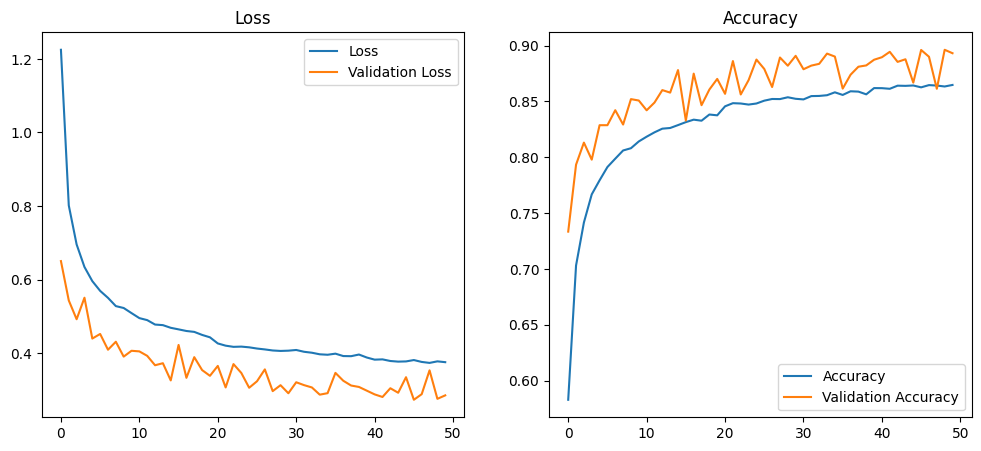

In [19]:
# Plotting results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [20]:
# Evaluate on test data
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9020 - loss: 0.2641
Test Loss: 0.2639
Test Accuracy: 0.9009


In [21]:
from sklearn.metrics import classification_report

# Get predictions and print classification report
predictions = cnn_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_classes, target_names=[f"Class {i}" for i in range(10)]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step
              precision    recall  f1-score   support

     Class 0       0.84      0.86      0.85      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.85      0.87      0.86      1000
     Class 3       0.92      0.91      0.92      1000
     Class 4       0.85      0.84      0.85      1000
     Class 5       0.97      0.97      0.97      1000
     Class 6       0.70      0.69      0.69      1000
     Class 7       0.93      0.96      0.94      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



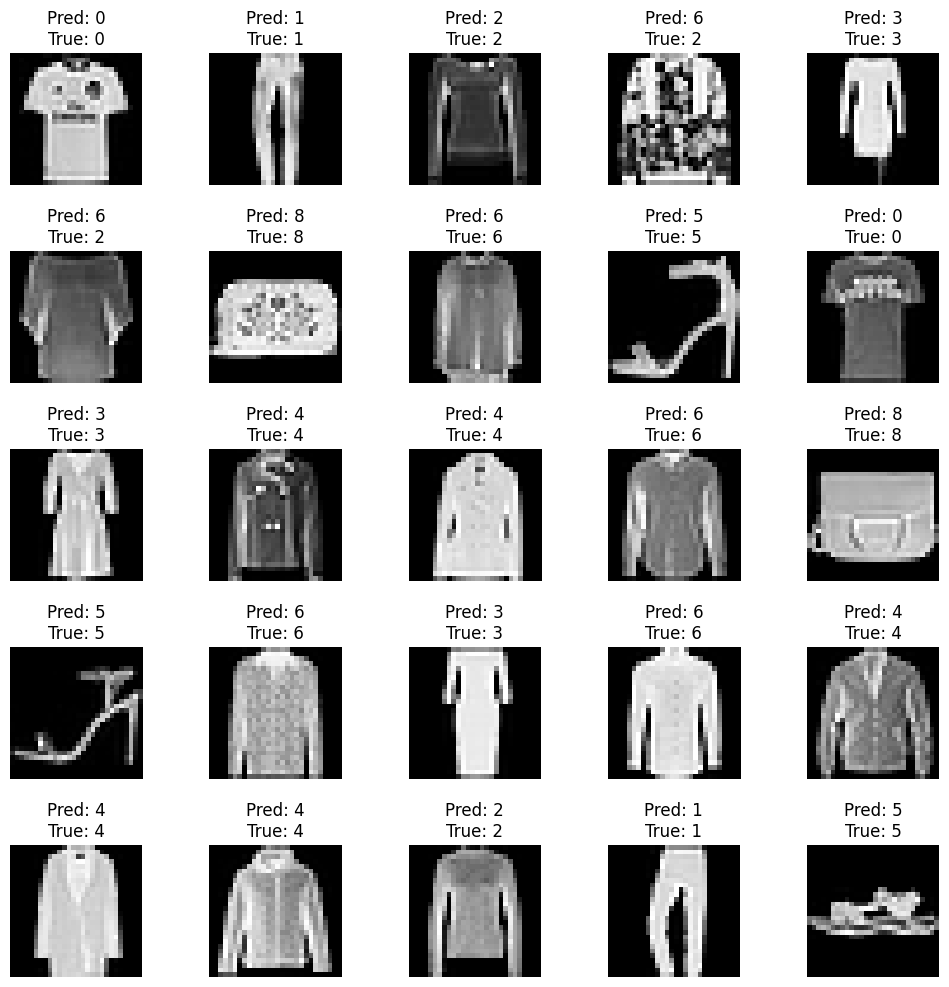

In [22]:
# Visualize some test predictions
L, W = 5, 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in range(L * W):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {predicted_classes[i]}\nTrue: {int(y_test[i])}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()